In [4]:
import pandas as pd
import numpy as np


In [5]:
df = pd.read_csv('Academic_Performance.csv')

In [6]:
df.head()

,STUDENT_ID,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE,OVEARLL_GRADE
0,SB11201210000129,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,71.0,93.0,71.0,93.0,79.0,91,FIRST CLASS
1,SB11201210000137,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,97.0,38.0,86.0,98.0,78.0,92,THIRD CLASS
2,SB11201210005154,M,No,Yes,ACADEMIC,ELECTRONIC ENGINEERING,17.0,1.0,18.0,43.0,22.0,7,DISTINCTION
3,SB11201210007504,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,65.0,35.0,76.0,80.0,48.0,67,FIRST CLASS
4,SB11201210007548,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,94.0,94.0,98.0,100.0,71.0,98,FIRST CLASS


In [7]:
missing_values = df.isnull().sum()
print(missing_values)

STUDENT_ID             0
GENDER                22
PLACEMENT             15
HONOR_OPTED_OR_NOT    14
EDUCATION_TYPE        15
ACADEMIC_PROGRAM      34
COURSE 1 MARKS        11
COURSE 2 MARKS         8
COURSE 3 MARKS        14
COURSE 4 MARKS        14
COURSE 5 MARKS        22
PERCENTILE             0
OVEARLL_GRADE          0
dtype: int64


In [8]:
df_cleaned = df.dropna()

In [9]:
missing_values = df_cleaned.isnull().sum()
print(missing_values)

STUDENT_ID            0
GENDER                0
PLACEMENT             0
HONOR_OPTED_OR_NOT    0
EDUCATION_TYPE        0
ACADEMIC_PROGRAM      0
COURSE 1 MARKS        0
COURSE 2 MARKS        0
COURSE 3 MARKS        0
COURSE 4 MARKS        0
COURSE 5 MARKS        0
PERCENTILE            0
OVEARLL_GRADE         0
dtype: int64


In [10]:
# Handle missing values for numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    if df[column].isnull().any():
        # Replace missing values with the mean of the column
        df[column].fillna(df[column].mean(), inplace=True)

# Handle missing values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    if df[column].isnull().any():
        # Replace missing values with the mode (most frequent value) of the column
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)

# Display the DataFrame after handling missing values
print(df)

             STUDENT_ID GENDER PLACEMENT HONOR_OPTED_OR_NOT EDUCATION_TYPE  \
0      SB11201210000129      F       Yes                Yes       ACADEMIC   
1      SB11201210000137      F       Yes                Yes       ACADEMIC   
2      SB11201210005154      M        No                Yes       ACADEMIC   
3      SB11201210007504      F       Yes                Yes       ACADEMIC   
4      SB11201210007548      M       Yes                Yes       ACADEMIC   
...                 ...    ...       ...                ...            ...   
12406  SB11201420568705      M       Yes                Yes       ACADEMIC   
12407  SB11201420573045      M       Yes                Yes       ACADEMIC   
12408  SB11201420578809      M       Yes                 No       ACADEMIC   
12409  SB11201420578812      F       Yes                Yes       ACADEMIC   
12410  SB11201420583232      M        No                 No       ACADEMIC   

               ACADEMIC_PROGRAM  COURSE 1 MARKS  COURSE 2 MARKS

In [11]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [12]:
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

Outliers:
 COURSE 1 MARKS    294
COURSE 2 MARKS      0
COURSE 3 MARKS      0
COURSE 4 MARKS      0
COURSE 5 MARKS      0
PERCENTILE          0
dtype: int64


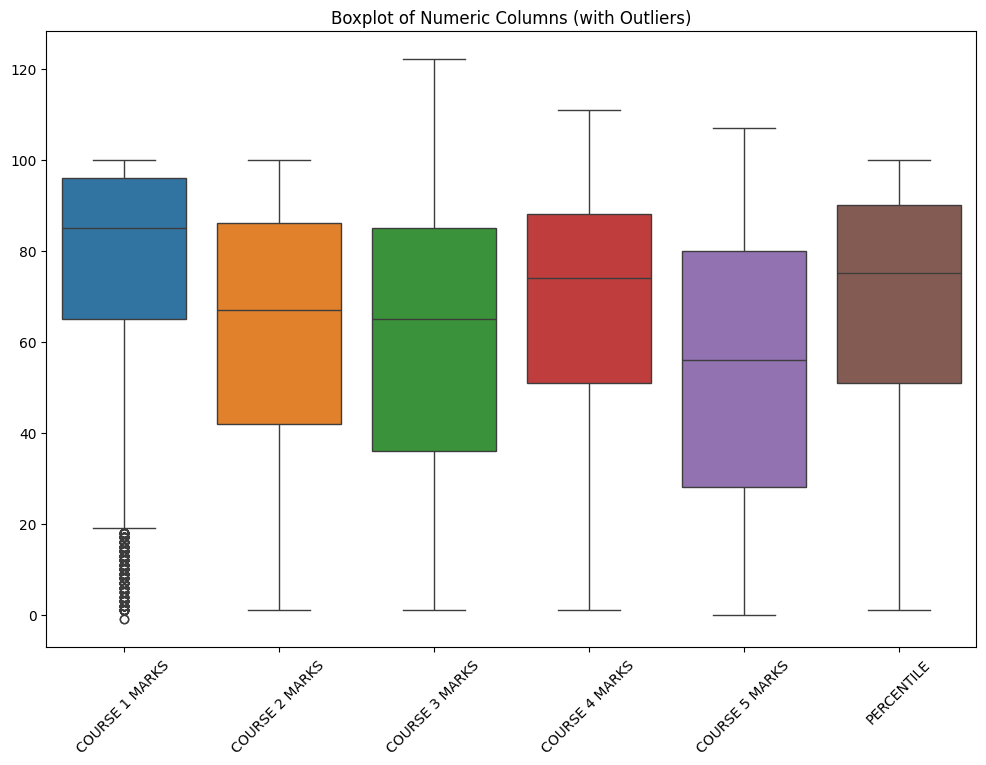

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplot of Numeric Columns (with Outliers)')
plt.xticks(rotation=45)
plt.show()


In [14]:
# Identify the rows containing outliers based on the IQR method
outliers_mask = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove the rows containing outliers
df_cleaned = df[~outliers_mask]

# Display the cleaned DataFrame
print(df_cleaned)

             STUDENT_ID GENDER PLACEMENT HONOR_OPTED_OR_NOT EDUCATION_TYPE  \
0      SB11201210000129      F       Yes                Yes       ACADEMIC   
1      SB11201210000137      F       Yes                Yes       ACADEMIC   
3      SB11201210007504      F       Yes                Yes       ACADEMIC   
4      SB11201210007548      M       Yes                Yes       ACADEMIC   
5      SB11201210007568      F       Yes                Yes       ACADEMIC   
...                 ...    ...       ...                ...            ...   
12406  SB11201420568705      M       Yes                Yes       ACADEMIC   
12407  SB11201420573045      M       Yes                Yes       ACADEMIC   
12408  SB11201420578809      M       Yes                 No       ACADEMIC   
12409  SB11201420578812      F       Yes                Yes       ACADEMIC   
12410  SB11201420583232      M        No                 No       ACADEMIC   

               ACADEMIC_PROGRAM  COURSE 1 MARKS  COURSE 2 MARKS

In [15]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Extract categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the categorical columns
encoded_columns = encoder.fit_transform(df[categorical_columns])

# Create DataFrame from encoded columns
df_encoded = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

# Drop original categorical columns from df
df = df.drop(categorical_columns, axis=1)

# Concatenate df and df_encoded
df_encoded = pd.concat([df, df_encoded], axis=1)

# Display the DataFrame after one-hot encoding
print(df_encoded)


       COURSE 1 MARKS  COURSE 2 MARKS  COURSE 3 MARKS  COURSE 4 MARKS  \
0                71.0            93.0            71.0            93.0   
1                97.0            38.0            86.0            98.0   
2                17.0             1.0            18.0            43.0   
3                65.0            35.0            76.0            80.0   
4                94.0            94.0            98.0           100.0   
...               ...             ...             ...             ...   
12406            88.0            71.0            86.0            87.0   
12407            46.0            39.0            44.0            11.0   
12408            98.0            88.0            90.0            81.0   
12409            60.0            80.0            51.0             8.0   
12410            83.0            95.0            91.0            79.0   

       COURSE 5 MARKS  PERCENTILE  STUDENT_ID_SB11201210000137  \
0                79.0          91                        